In [82]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
print("tensorflow version {}".format(tf.VERSION))

tensorflow version 1.12.0


In [83]:
#building the graph (the actual computation does not happen here, though its tempting to think of that)
#build the engine
g0=tf.Graph()
with g0.as_default():
    a = tf.constant([[1,2]], dtype=tf.float32,name='a_constant')
    b = tf.constant([[2,3]], dtype=tf.float32,name='b_constant')
    c=tf.add(a,b,name='add')  # c = a + b
    d=tf.multiply(c,a,name='multiply') #d = c * a
print(a)
print(b)
print(c)
print(d)

Tensor("a_constant:0", shape=(1, 2), dtype=float32)
Tensor("b_constant:0", shape=(1, 2), dtype=float32)
Tensor("add:0", shape=(1, 2), dtype=float32)
Tensor("multiply:0", shape=(1, 2), dtype=float32)


In [84]:
#computation occurs
#start the engine
sess0=tf.Session(graph=g0)
result=sess0.run([a,c,d])
print(result)

#visualize the graph
writer = tf.summary.FileWriter('.',sess0.graph)
writer.flush()

sess0.close()

[array([[1., 2.]], dtype=float32), array([[3., 5.]], dtype=float32), array([[ 3., 10.]], dtype=float32)]


In [85]:
!pwd

/Users/haobei/Projects/Tutorial


In [86]:
#tensor math matrix
#with "defaultGraph".as_default():
g1=tf.Graph()
a0 = tf.constant(2)
with g1.as_default():
    a = tf.random_normal([2,3], dtype=tf.float32,name='a_random')
    b = tf.constant([[1,1],[1,1],[1,1]], dtype=tf.float32,name='b')
    op = tf.print("value of a",a,name='print')
    var_x = tf.get_variable("var_x", [2,2], dtype=tf.float32, trainable=False,
                            initializer=tf.zeros_initializer)
    c = tf.matmul(a,b,name='matmul') # a @ b
    d = c + var_x #tf.add
print(a0,a0.graph)
print(a,a.graph)
print(b,b.graph)
print(op,op.graph)
print(var_x,var_x.graph)
print(c,c.graph)
print(d,d.graph)

Tensor("Const_1:0", shape=(), dtype=int32) <tensorflow.python.framework.ops.Graph object at 0xb3ab47358>
Tensor("a_random:0", shape=(2, 3), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb3b2112b0>
Tensor("b:0", shape=(3, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb3b2112b0>
name: "print"
op: "PrintV2"
input: "print_format"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref> <tensorflow.python.framework.ops.Graph object at 0xb3b2112b0>
Tensor("matmul:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb3b2112b0>
Tensor("add:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb3b2112b0>


In [87]:
sess1=tf.Session(graph=g1)

In [88]:
print('print',sess1.run(op))
print('a',sess1.run(a)) #print(a.eval(session=sess))
print('matmul',sess1.run('matmul'))
print('c',sess1.run('matmul:0')) #c
print('a,c',sess1.run([a,c]))
print('initilizer',sess1.run(var_x.initializer))
# with g1.as_default():
#     sess1.run(tf.global_variables_initializer())
print('d',sess1.run(d))
print('var_x',sess1.run(var_x))
print('d',sess1.run(d))
print('assign',sess1.run(var_x.assign_add([[1,0],[1,1]])))
print('var_x,d',sess1.run([var_x,d]))

print None
a [[ 0.7043568  -0.38598648  0.43297216]
 [-0.7467082   0.40801045 -1.4454266 ]]
matmul None
c [[-1.8343472 -1.8343472]
 [ 1.4827539  1.4827539]]
a,c [array([[ 0.38665038, -0.78545684,  0.7305011 ],
       [-0.66682094, -0.0534654 , -1.1662813 ]], dtype=float32), array([[ 0.33169466,  0.33169466],
       [-1.8865677 , -1.8865677 ]], dtype=float32)]
initilizer None
d [[ 2.3368888  2.3368888]
 [-1.6967262 -1.6967262]]
var_x [[0. 0.]
 [0. 0.]]
d [[-3.782011   -3.782011  ]
 [ 0.41647005  0.41647005]]
assign [[1. 0.]
 [1. 1.]]
var_x,d [array([[1., 0.],
       [1., 1.]], dtype=float32), array([[ 0.1067096, -0.8932904],
       [ 1.3037612,  1.3037612]], dtype=float32)]


In [89]:
writer = tf.summary.FileWriter('.',sess1.graph)
writer.flush()

In [90]:
with g1.as_default():
    print(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)) 
    print(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

[<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref>]
[]


In [91]:
sess1.close()

In [92]:
# one-dimension linear regression
x = np.array([[1], [2], [3], [4]],dtype=np.float32)
y = np.array([[4], [3], [2], [1]],dtype=np.float32)

In [93]:
# build default graph
tf.reset_default_graph()
# mini-batch 
x_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(1,),dtype=tf.float32,
                    initializer=tf.ones_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)
y_hat = W * x_p + b
loss = tf.reduce_mean(tf.square(y_hat - y_p))

In [94]:
sess=tf.Session() # session of the default graph
#print the design blue print of the engine
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [95]:
#gradient = tf.gradients(loss,[W,b])
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))
#print the design blue print of the engine
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [96]:
sess.run(tf.global_variables_initializer())
W_init = sess.run([W,b])
print(W_init)
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
#     sess.run([W.assign_sub(0.1*grad[0]),b.assign_sub(0.1*grad[1])])
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad, "\t", W_old,b_old, "==>",W_new,b_new)
print(sess.run([W,b]))

[array([1.], dtype=float32), array([0.], dtype=float32)]
[array([[1.],
       [2.],
       [3.],
       [4.]], dtype=float32), 5.0, [array([5.], dtype=float32), array([0.], dtype=float32)]]
0 gradient:  [array([5.], dtype=float32), array([0.], dtype=float32)] 	 [1.] [0.] ==> [0.5] [0.]
1 gradient:  [array([-2.5], dtype=float32), array([-2.5], dtype=float32)] 	 [0.5] [0.] ==> [0.75] [0.25]
2 gradient:  [array([2.5], dtype=float32), array([-0.75], dtype=float32)] 	 [0.75] [0.25] ==> [0.5] [0.325]
3 gradient:  [array([-0.87499976], dtype=float32), array([-1.8499999], dtype=float32)] 	 [0.5] [0.325] ==> [0.5875] [0.51]
4 gradient:  [array([1.3624997], dtype=float32), array([-1.0425001], dtype=float32)] 	 [0.5875] [0.51] ==> [0.45125002] [0.61425]
5 gradient:  [array([-0.15999997], dtype=float32), array([-1.51525], dtype=float32)] 	 [0.45125002] [0.61425] ==> [0.46725002] [0.765775]
6 gradient:  [array([0.8376255], dtype=float32), array([-1.1321998], dtype=float32)] 	 [0.46725002] [0.765775

64 gradient:  [array([0.07410336], dtype=float32), array([-0.21787226], dtype=float32)] 	 [-0.75248635] [4.2722797] ==> [-0.7598967] [4.294067]
65 gradient:  [array([0.07188404], dtype=float32), array([-0.21134973], dtype=float32)] 	 [-0.7598967] [4.294067] ==> [-0.7670851] [4.3152018]
66 gradient:  [array([0.06973267], dtype=float32), array([-0.20502186], dtype=float32)] 	 [-0.7670851] [4.3152018] ==> [-0.77405834] [4.335704]
67 gradient:  [array([0.06764412], dtype=float32), array([-0.19888401], dtype=float32)] 	 [-0.77405834] [4.335704] ==> [-0.78082275] [4.3555923]
68 gradient:  [array([0.06561995], dtype=float32), array([-0.19292927], dtype=float32)] 	 [-0.78082275] [4.3555923] ==> [-0.78738475] [4.374885]
69 gradient:  [array([0.06365418], dtype=float32), array([-0.18715358], dtype=float32)] 	 [-0.78738475] [4.374885] ==> [-0.79375017] [4.3936005]
70 gradient:  [array([0.06174994], dtype=float32), array([-0.1815499], dtype=float32)] 	 [-0.79375017] [4.3936005] ==> [-0.79992515] [

In [97]:
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print("prediction")
print(prediction[0])
print("target")
print(y)
# 1000 steps

prediction
[[3.8392346]
 [2.9220982]
 [2.004962 ]
 [1.0878255]]
target
[[4.]
 [3.]
 [2.]
 [1.]]


In [98]:
sess.close()

In [113]:
# single sigmoid neuron prediction on two-dimension data
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[1],[1]])
#tf.sigmoid() tf.reduce_mean()

In [114]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
y_hat = tf.sigmoid(tf.reduce_sum(x_p*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

In [115]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [116]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad[0], "\t", W_old,b_old, "==>",W_new,b_new)
sess.run([W,b])

0 gradient:  [-0.03555535 -0.02355748] 	 [-0.27448535  0.24800704] -0.5158415 ==> [-0.2709298   0.25036278] -0.50999194
1 gradient:  [-0.03513666 -0.02304665] 	 [-0.2709298   0.25036278] -0.50999194 ==> [-0.26741615  0.25266746] -0.50422204
2 gradient:  [-0.03471742 -0.02253892] 	 [-0.26741615  0.25266746] -0.50422204 ==> [-0.26394442  0.25492135] -0.4985315
3 gradient:  [-0.03429794 -0.02203453] 	 [-0.26394442  0.25492135] -0.4985315 ==> [-0.26051462  0.2571248 ] -0.49291992
4 gradient:  [-0.03387852 -0.02153376] 	 [-0.26051462  0.2571248 ] -0.49291992 ==> [-0.25712678  0.25927818] -0.4873869
5 gradient:  [-0.03345943 -0.02103681] 	 [-0.25712678  0.25927818] -0.4873869 ==> [-0.25378084  0.26138186] -0.481932
6 gradient:  [-0.03304097 -0.02054391] 	 [-0.25378084  0.26138186] -0.481932 ==> [-0.25047675  0.26343626] -0.47655478
7 gradient:  [-0.03262337 -0.02005525] 	 [-0.25047675  0.26343626] -0.47655478 ==> [-0.2472144   0.26544178] -0.4712547
8 gradient:  [-0.03220689 -0.01957103] 	 [

70 gradient:  [-0.01307229 -0.00015602] 	 [-0.11360507  0.31701142] -0.2627134 ==> [-0.11229784  0.31702703] -0.26077333
71 gradient:  [-1.2882752e-02  6.5318309e-06] 	 [-0.11229784  0.31702703] -0.26077333 ==> [-0.11100957  0.31702638] -0.25886396
72 gradient:  [-0.01269635  0.00016559] 	 [-0.11100957  0.31702638] -0.25886396 ==> [-0.10973993  0.3170098 ] -0.25698474
73 gradient:  [-0.01251306  0.00032122] 	 [-0.10973993  0.3170098 ] -0.25698474 ==> [-0.10848863  0.31697768] -0.25513515
74 gradient:  [-0.01233281  0.00047349] 	 [-0.10848863  0.31697768] -0.25513515 ==> [-0.10725535  0.31693032] -0.25331464
75 gradient:  [-0.01215556  0.00062244] 	 [-0.10725535  0.31693032] -0.25331464 ==> [-0.10603979  0.31686807] -0.25152272
76 gradient:  [-0.01198129  0.00076813] 	 [-0.10603979  0.31686807] -0.25152272 ==> [-0.10484166  0.31679127] -0.24975885
77 gradient:  [-0.01180993  0.00091065] 	 [-0.10484166  0.31679127] -0.24975885 ==> [-0.10366067  0.3167002 ] -0.24802254
78 gradient:  [-0.0

139 gradient:  [-0.00529907  0.00545097] 	 [-0.05494926  0.29376468] -0.17878592 ==> [-0.05441935  0.2932196 ] -0.17806095
140 gradient:  [-0.00523984  0.00547861] 	 [-0.05441935  0.2932196 ] -0.17806095 ==> [-0.05389537  0.29267174] -0.17734465
141 gradient:  [-0.00518157  0.00550536] 	 [-0.05389537  0.29267174] -0.17734465 ==> [-0.05337721  0.2921212 ] -0.17663686
142 gradient:  [-0.00512423  0.00553125] 	 [-0.05337721  0.2921212 ] -0.17663686 ==> [-0.05286479  0.29156807] -0.17593744
143 gradient:  [-0.00506782  0.00555625] 	 [-0.05286479  0.29156807] -0.17593744 ==> [-0.05235801  0.29101244] -0.17524624
144 gradient:  [-0.0050123   0.00558043] 	 [-0.05235801  0.29101244] -0.17524624 ==> [-0.05185677  0.2904544 ] -0.1745631
145 gradient:  [-0.00495767  0.00560379] 	 [-0.05185677  0.2904544 ] -0.1745631 ==> [-0.05136101  0.289894  ] -0.17388786
146 gradient:  [-0.00490391  0.00562633] 	 [-0.05136101  0.289894  ] -0.17388786 ==> [-0.05087062  0.28933138] -0.17322041
147 gradient:  [-0

206 gradient:  [-0.00280322  0.00598399] 	 [-0.02904895  0.25429943] -0.14371613 ==> [-0.02876863  0.25370103] -0.14333394
207 gradient:  [-0.00278114  0.0059793 ] 	 [-0.02876863  0.25370103] -0.14333394 ==> [-0.02849052  0.2531031 ] -0.14295447
208 gradient:  [-0.00275934  0.00597442] 	 [-0.02849052  0.2531031 ] -0.14295447 ==> [-0.02821458  0.25250566] -0.14257766
209 gradient:  [-0.00273781  0.00596932] 	 [-0.02821458  0.25250566] -0.14257766 ==> [-0.0279408   0.25190872] -0.14220348
210 gradient:  [-0.00271656  0.00596402] 	 [-0.0279408   0.25190872] -0.14220348 ==> [-0.02766915  0.25131232] -0.14183187
211 gradient:  [-0.00269558  0.00595853] 	 [-0.02766915  0.25131232] -0.14183187 ==> [-0.02739959  0.25071645] -0.14146282
212 gradient:  [-0.00267486  0.00595286] 	 [-0.02739959  0.25071645] -0.14146282 ==> [-0.0271321   0.25012118] -0.14109626
213 gradient:  [-0.00265441  0.005947  ] 	 [-0.0271321   0.25012118] -0.14109626 ==> [-0.02686666  0.24952647] -0.14073217
214 gradient:  [

277 gradient:  [-0.00172746  0.00533871] 	 [-0.01339734  0.21379615] -0.12146535 ==> [-0.01322459  0.21326229] -0.121202596
278 gradient:  [-0.00171714  0.00532725] 	 [-0.01322459  0.21326229] -0.121202596 ==> [-0.01305288  0.21272956] -0.12094085
279 gradient:  [-0.00170692  0.00531577] 	 [-0.01305288  0.21272956] -0.12094085 ==> [-0.01288219  0.21219797] -0.12068009
280 gradient:  [-0.00169679  0.00530427] 	 [-0.01288219  0.21219797] -0.12068009 ==> [-0.01271251  0.21166755] -0.12042031
281 gradient:  [-0.00168674  0.00529275] 	 [-0.01271251  0.21166755] -0.12042031 ==> [-0.01254383  0.21113828] -0.12016149
282 gradient:  [-0.00167678  0.0052812 ] 	 [-0.01254383  0.21113828] -0.12016149 ==> [-0.01237615  0.21061015] -0.119903624
283 gradient:  [-0.00166689  0.00526965] 	 [-0.01237615  0.21061015] -0.119903624 ==> [-0.01220947  0.21008319] -0.119646706
284 gradient:  [-0.0016571   0.00525807] 	 [-0.01220947  0.21008319] -0.119646706 ==> [-0.01204376  0.20955738] -0.119390726
285 gradi

345 gradient:  [-0.00117801  0.00454761] 	 [-0.00364162  0.18014851] -0.105436824 ==> [-0.00352382  0.17969376] -0.10522379
346 gradient:  [-0.00117165  0.00453625] 	 [-0.00352382  0.17969376] -0.10522379 ==> [-0.00340665  0.17924014] -0.1050113
347 gradient:  [-0.00116531  0.0045249 ] 	 [-0.00340665  0.17924014] -0.1050113 ==> [-0.00329012  0.17878765] -0.10479935
348 gradient:  [-0.00115903  0.00451356] 	 [-0.00329012  0.17878765] -0.10479935 ==> [-0.00317422  0.17833629] -0.10458794
349 gradient:  [-0.00115278  0.00450225] 	 [-0.00317422  0.17833629] -0.10458794 ==> [-0.00305894  0.17788607] -0.10437706
350 gradient:  [-0.00114656  0.00449096] 	 [-0.00305894  0.17788607] -0.10437706 ==> [-0.00294428  0.17743698] -0.10416671
351 gradient:  [-0.00114038  0.00447967] 	 [-0.00294428  0.17743698] -0.10416671 ==> [-0.00283024  0.176989  ] -0.103956886
352 gradient:  [-0.00113423  0.00446841] 	 [-0.00283024  0.176989  ] -0.103956886 ==> [-0.00271682  0.17654216] -0.103747584
353 gradient: 

415 gradient:  [-0.00080568  0.00380093] 	 [0.00324178 0.15095282] -0.09168335 ==> [0.00332234 0.15057272] -0.09150207
416 gradient:  [-0.00080124  0.00379106] 	 [0.00332234 0.15057272] -0.09150207 ==> [0.00340247 0.15019362] -0.09132118
417 gradient:  [-0.00079682  0.00378122] 	 [0.00340247 0.15019362] -0.09132118 ==> [0.00348215 0.1498155 ] -0.09114067
418 gradient:  [-0.00079242  0.00377139] 	 [0.00348215 0.1498155 ] -0.09114067 ==> [0.00356139 0.14943837] -0.09096055
419 gradient:  [-0.00078804  0.00376159] 	 [0.00356139 0.14943837] -0.09096055 ==> [0.00364019 0.1490622 ] -0.09078081
420 gradient:  [-0.00078369  0.00375181] 	 [0.00364019 0.1490622 ] -0.09078081 ==> [0.00371856 0.14868702] -0.09060145
421 gradient:  [-0.00077934  0.00374206] 	 [0.00371856 0.14868702] -0.09060145 ==> [0.0037965 0.1483128] -0.090422474
422 gradient:  [-0.00077503  0.00373233] 	 [0.0037965 0.1483128] -0.090422474 ==> [0.003874   0.14793958] -0.090243876
423 gradient:  [-0.00077073  0.00372262] 	 [0.003

485 gradient:  [-0.00053844  0.00316574] 	 [0.00791139 0.12660319] -0.079862885 ==> [0.00796524 0.12628661] -0.07970595
486 gradient:  [-0.00053519  0.00315746] 	 [0.00796524 0.12628661] -0.07970595 ==> [0.00801875 0.12597087] -0.07954934
487 gradient:  [-0.00053195  0.00314921] 	 [0.00801875 0.12597087] -0.07954934 ==> [0.00807195 0.12565595] -0.079393044
488 gradient:  [-0.00052871  0.00314098] 	 [0.00807195 0.12565595] -0.079393044 ==> [0.00812482 0.12534185] -0.07923706
489 gradient:  [-0.0005255   0.00313277] 	 [0.00812482 0.12534185] -0.07923706 ==> [0.00817737 0.12502857] -0.07908139
490 gradient:  [-0.0005223   0.00312457] 	 [0.00817737 0.12502857] -0.07908139 ==> [0.0082296  0.12471611] -0.07892603
491 gradient:  [-0.00051912  0.00311642] 	 [0.0082296  0.12471611] -0.07892603 ==> [0.00828151 0.12440447] -0.07877098
492 gradient:  [-0.00051594  0.00310826] 	 [0.00828151 0.12440447] -0.07877098 ==> [0.00833311 0.12409364] -0.07861624
493 gradient:  [-0.00051277  0.00310015] 	 [0

554 gradient:  [-0.00034344  0.00264331] 	 [0.01093067 0.10659105] -0.06973698 ==> [0.01096501 0.10632671] -0.06960018
555 gradient:  [-0.00034102  0.00263642] 	 [0.01096501 0.10632671] -0.06960018 ==> [0.01099911 0.10606308] -0.06946365
556 gradient:  [-0.0003386   0.00262955] 	 [0.01099911 0.10606308] -0.06946365 ==> [0.01103297 0.10580012] -0.069327384
557 gradient:  [-0.0003362   0.00262271] 	 [0.01103297 0.10580012] -0.069327384 ==> [0.01106659 0.10553785] -0.06919139
558 gradient:  [-0.00033381  0.00261588] 	 [0.01106659 0.10553785] -0.06919139 ==> [0.01109997 0.10527626] -0.06905566
559 gradient:  [-0.00033142  0.00260907] 	 [0.01109997 0.10527626] -0.06905566 ==> [0.01113311 0.10501536] -0.0689202
560 gradient:  [-0.00032904  0.00260227] 	 [0.01113311 0.10501536] -0.0689202 ==> [0.01116602 0.10475513] -0.06878501
561 gradient:  [-0.00032669  0.00259549] 	 [0.01116602 0.10475513] -0.06878501 ==> [0.01119869 0.10449558] -0.06865009
562 gradient:  [-0.00032434  0.00258874] 	 [0.01

625 gradient:  [-0.00019492  0.00219778] 	 [0.0128222  0.08943337] -0.060663935 ==> [0.01284169 0.08921359] -0.06054498
626 gradient:  [-0.00019314  0.0021921 ] 	 [0.01284169 0.08921359] -0.06054498 ==> [0.012861   0.08899438] -0.060426258
627 gradient:  [-0.00019138  0.00218643] 	 [0.012861   0.08899438] -0.060426258 ==> [0.01288014 0.08877574] -0.060307767
628 gradient:  [-0.0001896   0.00218078] 	 [0.01288014 0.08877574] -0.060307767 ==> [0.0128991  0.08855766] -0.06018951
629 gradient:  [-0.00018785  0.00217514] 	 [0.0128991  0.08855766] -0.06018951 ==> [0.01291789 0.08834015] -0.060071487
630 gradient:  [-0.0001861   0.00216951] 	 [0.01291789 0.08834015] -0.060071487 ==> [0.0129365  0.08812319] -0.059953693
631 gradient:  [-0.00018436  0.00216391] 	 [0.0129365  0.08812319] -0.059953693 ==> [0.01295493 0.08790681] -0.059836134
632 gradient:  [-0.00018263  0.00215831] 	 [0.01295493 0.08790681] -0.059836134 ==> [0.0129732  0.08769098] -0.059718803
633 gradient:  [-0.00018091  0.00215

694 gradient:  [-8.9177396e-05  1.8393599e-03] 	 [0.01378859 0.0755256 ] -0.052980267 ==> [0.01379751 0.07534167] -0.052876383
695 gradient:  [-8.7877153e-05  1.8346468e-03] 	 [0.01379751 0.07534167] -0.052876383 ==> [0.01380629 0.07515821] -0.052772705
696 gradient:  [-8.6582499e-05  1.8299337e-03] 	 [0.01380629 0.07515821] -0.052772705 ==> [0.01381495 0.07497521] -0.052669227
697 gradient:  [-8.5293665e-05  1.8252354e-03] 	 [0.01381495 0.07497521] -0.052669227 ==> [0.01382348 0.07479269] -0.052565955
698 gradient:  [-8.4013911e-05  1.8205522e-03] 	 [0.01382348 0.07479269] -0.052565955 ==> [0.01383188 0.07461064] -0.052462883
699 gradient:  [-8.2739745e-05  1.8158763e-03] 	 [0.01383188 0.07461064] -0.052462883 ==> [0.01384016 0.07442905] -0.052360013
700 gradient:  [-8.1469305e-05  1.8112226e-03] 	 [0.01384016 0.07442905] -0.052360013 ==> [0.0138483  0.07424793] -0.052257344
701 gradient:  [-8.021016e-05  1.806584e-03] 	 [0.0138483  0.07424793] -0.052257344 ==> [0.01385633 0.07406726]

760 gradient:  [-1.5418162e-05  1.5534831e-03] 	 [0.01412458 0.06434277] -0.046543 ==> [0.01412612 0.06418742] -0.046451733
761 gradient:  [-1.4472753e-05  1.5495289e-03] 	 [0.01412612 0.06418742] -0.046451733 ==> [0.01412757 0.06403247] -0.046360645
762 gradient:  [-1.3542245e-05  1.5455820e-03] 	 [0.01412757 0.06403247] -0.046360645 ==> [0.01412892 0.06387792] -0.046269737
763 gradient:  [-1.25985825e-05  1.54165749e-03] 	 [0.01412892 0.06387792] -0.046269737 ==> [0.01413018 0.06372375] -0.046179008
764 gradient:  [-1.1673663e-05  1.5377256e-03] 	 [0.01413018 0.06372375] -0.046179008 ==> [0.01413135 0.06356998] -0.046088457
765 gradient:  [-1.0743039e-05  1.5338159e-03] 	 [0.01413135 0.06356998] -0.046088457 ==> [0.01413242 0.06341659] -0.04599808
766 gradient:  [-9.8217279e-06  1.5299136e-03] 	 [0.01413242 0.06341659] -0.04599808 ==> [0.0141334 0.0632636] -0.045907885
767 gradient:  [-8.9117093e-06  1.5260188e-03] 	 [0.0141334 0.0632636] -0.045907885 ==> [0.0141343 0.063111 ] -0.045

826 gradient:  [3.7613441e-05 1.3138725e-03] 	 [0.01404402 0.05489171] -0.0408876 ==> [0.01404026 0.05476032] -0.04080742
827 gradient:  [3.8281956e-05 1.3105508e-03] 	 [0.01404026 0.05476032] -0.04080742 ==> [0.01403643 0.05462927] -0.04072739
828 gradient:  [3.8944767e-05 1.3072439e-03] 	 [0.01403643 0.05462927] -0.04072739 ==> [0.01403254 0.05449854] -0.04064752
829 gradient:  [3.9620616e-05 1.3039594e-03] 	 [0.01403254 0.05449854] -0.04064752 ==> [0.01402857 0.05436815] -0.04056781
830 gradient:  [4.0277897e-05 1.3006676e-03] 	 [0.01402857 0.05436815] -0.04056781 ==> [0.01402455 0.05423808] -0.040488258
831 gradient:  [4.0925806e-05 1.2973757e-03] 	 [0.01402455 0.05423808] -0.040488258 ==> [0.01402045 0.05410834] -0.04040886
832 gradient:  [4.1579362e-05 1.2941060e-03] 	 [0.01402045 0.05410834] -0.04040886 ==> [0.01401629 0.05397893] -0.040329617
833 gradient:  [4.2229134e-05 1.2908513e-03] 	 [0.01401629 0.05397893] -0.040329617 ==> [0.01401207 0.05384985] -0.04025053
834 gradient:

894 gradient:  [7.5562682e-05 1.1072467e-03] 	 [0.01365273 0.04667062] -0.035778347 ==> [0.01364518 0.04655989] -0.03570818
895 gradient:  [7.6009717e-05 1.1044759e-03] 	 [0.01364518 0.04655989] -0.03570818 ==> [0.01363758 0.04644945] -0.035638154
896 gradient:  [7.6465949e-05 1.1017126e-03] 	 [0.01363758 0.04644945] -0.035638154 ==> [0.01362993 0.04633927] -0.035568263
897 gradient:  [7.6916767e-05 1.0989566e-03] 	 [0.01362993 0.04633927] -0.035568263 ==> [0.01362224 0.04622938] -0.035498507
898 gradient:  [7.7359960e-05 1.0962081e-03] 	 [0.01362224 0.04622938] -0.035498507 ==> [0.0136145  0.04611976] -0.03542889
899 gradient:  [7.779768e-05 1.093467e-03] 	 [0.0136145  0.04611976] -0.03542889 ==> [0.01360672 0.04601041] -0.03535941
900 gradient:  [7.8237266e-05 1.0907335e-03] 	 [0.01360672 0.04601041] -0.03535941 ==> [0.0135989  0.04590134] -0.035290062
901 gradient:  [7.8678655e-05 1.0880074e-03] 	 [0.0135989  0.04590134] -0.035290062 ==> [0.01359103 0.04579253] -0.035220854
902 grad

962 gradient:  [0.00010059 0.00093454] 	 [0.01304872 0.03973736] -0.03130731 ==> [0.01303866 0.03964391] -0.031245908
963 gradient:  [0.00010088 0.00093222] 	 [0.01303866 0.03964391] -0.031245908 ==> [0.01302857 0.03955069] -0.031184627
964 gradient:  [0.00010116 0.00092992] 	 [0.01302857 0.03955069] -0.031184627 ==> [0.01301845 0.0394577 ] -0.031123467
965 gradient:  [0.00010145 0.00092761] 	 [0.01301845 0.0394577 ] -0.031123467 ==> [0.01300831 0.03936494] -0.031062426
966 gradient:  [0.00010173 0.0009253 ] 	 [0.01300831 0.03936494] -0.031062426 ==> [0.01299814 0.03927241] -0.031001505
967 gradient:  [0.00010201 0.00092302] 	 [0.01299814 0.03927241] -0.031001505 ==> [0.01298793 0.03918011] -0.030940702
968 gradient:  [0.00010228 0.00092072] 	 [0.01298793 0.03918011] -0.030940702 ==> [0.01297771 0.03908804] -0.03088002
969 gradient:  [0.00010257 0.00091845] 	 [0.01297771 0.03908804] -0.03088002 ==> [0.01296745 0.03899619] -0.030819457
970 gradient:  [0.00010285 0.00091618] 	 [0.0129674

[array([0.01264789, 0.03634401], dtype=float32), -0.029056739]

(10000,)


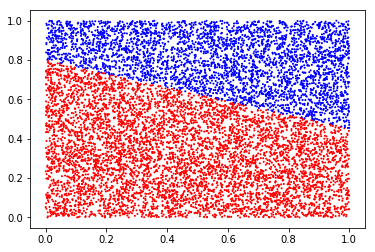

In [117]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [118]:
print(sess.run(y_hat,feed_dict={x_p:x}))

[0.49273637 0.49589786 0.5018218  0.5049836 ]


In [119]:
sess.close()

In [106]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])
#not linear separable

In [107]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
# L = tf.get_variable("linear_transform",shape=(2,2),dtype=tf.float32,
#                     initializer=tf.random_normal_initializer,
#                     trainable=True)
L = tf.constant([[1,-1],[-1,1]],dtype=tf.float32) # benifit of keeping track of trainable variables
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)

In [108]:
y_hat = tf.sigmoid(tf.reduce_sum(tf.square(x_p @ L)*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

In [109]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [110]:
sess.run(tf.global_variables_initializer())
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    print("{} {}".format(i,grad))
# print(sess.run([W,L,b]))
print(sess.run([W,b]))

0 [array([0.03836919, 0.03836919], dtype=float32), array([0.03836919], dtype=float32)]
1 [array([0.03796532, 0.03796532], dtype=float32), array([0.03772551], dtype=float32)]
2 [array([0.03755841, 0.03755841], dtype=float32), array([0.03708283], dtype=float32)]
3 [array([0.03714886, 0.03714886], dtype=float32), array([0.03644152], dtype=float32)]
4 [array([0.036737, 0.036737], dtype=float32), array([0.03580196], dtype=float32)]
5 [array([0.03632319, 0.03632319], dtype=float32), array([0.03516445], dtype=float32)]
6 [array([0.03590778, 0.03590778], dtype=float32), array([0.03452935], dtype=float32)]
7 [array([0.03549108, 0.03549108], dtype=float32), array([0.03389695], dtype=float32)]
8 [array([0.03507346, 0.03507346], dtype=float32), array([0.03326764], dtype=float32)]
9 [array([0.03465519, 0.03465519], dtype=float32), array([0.03264164], dtype=float32)]
10 [array([0.0342366, 0.0342366], dtype=float32), array([0.03201927], dtype=float32)]
11 [array([0.03381798, 0.03381798], dtype=float3

97 [array([0.01007257, 0.01007257], dtype=float32), array([0.0009099], dtype=float32)]
98 [array([0.00994438, 0.00994438], dtype=float32), array([0.00077613], dtype=float32)]
99 [array([0.00981849, 0.00981849], dtype=float32), array([0.00064551], dtype=float32)]
[array([ 0.41229326, -0.10800323], dtype=float32), array([-0.14790444], dtype=float32)]


(10000,)


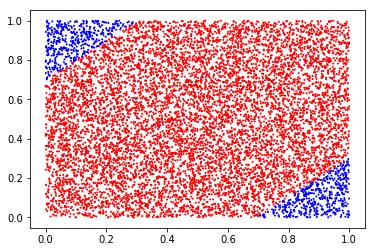

In [111]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [112]:
sess.close()

# Summary
## 1. What is tensorflow?
## 2. Why do people use tensorflow?
## 3. How to write tensorflow program?
### (1). Build dataflow graph
### (2). Run dataflow graph and train the weights
## 4. (Bonus) What is feature learning and feature crafting (feature engineering), Difference, how to do feature crafting?

## 1. 

## 2.

## 3.(1). 

## 3.(2).

## 4.